# 인턴 1차 과제

#  

 1.기본적인 conncet 과정
 
 2.국내 매출 데이터 전처리 과정 
 
 3.네이버 검색량 데이터
 
 4.연령별 구매내역
 
 5.루시 데이터 전처리

## 기본적인 connect 과정

In [70]:
pip install psycopg2

SyntaxError: invalid syntax (<ipython-input-70-76c1d690d9ab>, line 1)

In [72]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [59]:
import time
import pandas as pd
import psycopg2
import datetime
from tqdm import trange

In [ ]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 
# %matplotlib inline 
import platform
from matplotlib import font_manager, rc # plt.rcParams['axes.unicode_minus'] = False 
if platform.system() == 'Darwin': rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': 
    path = "c:/Windows/Fonts/malgun.ttf" 
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name) 
else: 
    print('Unknown system... sorry~~~~')


In [24]:
# DB 연결 부분
uswer = 'dt.intern'
host = '10.80.0.234'
port = '5439'
dbname = 'fnf'
con = psycopg2.connect(dbname='fnf',host='10.80.0.234', port='5439', user = 'dt.intern', password='DTintn0926')
cur = con.cursor()


## 국내 매출 데이터 전처리 과정

In [130]:
start = time.time()

sql = "SELECT sales.saledate,sales.amt_act,sales.qty FROM ax.vw_d_shop shop JOIN ax.mvw_f_sales sales ON shop.shopkey = sales.shopkey WHERE shop.country_nm='한국' AND sales.brand = 'X' AND sales.saledate BETWEEN To_date('2018-01-01', 'YYYY-MM-DD') AND To_date('2019-12-31', 'YYYY-MM-DD') ;"
cur.execute(sql)
result = cur.fetchall()

sales_df = pd.DataFrame(result)
sales_df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(sales_df)

time : 155.76600551605225
                  0          1  2
0        2018-04-21  107460.00  1
1        2018-08-15   42340.00  1
2        2018-05-07   45000.00  1
3        2018-09-26   59400.00  1
4        2018-06-06   80300.00  1
...             ...        ... ..
6371260  2019-09-26  -79000.00 -1
6371261  2018-07-17   50000.00  1
6371262  2018-09-17  -39500.00 -1
6371263  2018-05-04   41400.00  1
6371264  2018-11-23  325000.00  1

[6371265 rows x 3 columns]


In [131]:
# 컬럼 수정
sales_df.columns = ['sale_date', 'amt_act','qty']
sales_df

,sale_date,amt_act,qty
0,2018-04-21,107460.00,1
1,2018-08-15,42340.00,1
2,2018-05-07,45000.00,1
3,2018-09-26,59400.00,1
4,2018-06-06,80300.00,1
...,...,...,...
6371260,2019-09-26,-79000.00,-1
6371261,2018-07-17,50000.00,1
6371262,2018-09-17,-39500.00,-1
6371263,2018-05-04,41400.00,1


In [132]:
# 날짜 변환
sales_df['sale_date'] = pd.to_datetime(sales_df['sale_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')
sales_df

,sale_date,amt_act,qty
0,2018-04-21,107460.00,1
1,2018-08-15,42340.00,1
2,2018-05-07,45000.00,1
3,2018-09-26,59400.00,1
4,2018-06-06,80300.00,1
...,...,...,...
6371260,2019-09-26,-79000.00,-1
6371261,2018-07-17,50000.00,1
6371262,2018-09-17,-39500.00,-1
6371263,2018-05-04,41400.00,1


In [140]:
# 일자별 매출 데이터
aa= sales_df.groupby(sales_df['sale_date'])['qty'].sum()
aa

sale_date
2018-01-01     2807
2018-01-02     7061
2018-01-03     4059
2018-01-04     3610
2018-01-05     4341
              ...  
2019-12-27     7688
2019-12-28    11016
2019-12-29    10875
2019-12-30     6930
2019-12-31     7346
Name: qty, Length: 730, dtype: int64

In [142]:
# 일자별 매출 데이터
sales_amt_df = sales_df[['sale_date','amt_act']].groupby(sales_df['sale_date']).sum()

# 일자별 수량 데이터
sales_qty_df = sales_df[['sale_date','qty']].groupby(sales_df['sale_date']).sum()


,qty
sale_date,
2018-01-01,2807
2018-01-02,7061
2018-01-03,4059
2018-01-04,3610
2018-01-05,4341
...,...
2019-12-27,7688
2019-12-28,11016
2019-12-29,10875


In [144]:
sales_amt_df = sales_amt_df.reset_index().rename(columns={"index": "sale_date"})
sales_qty_df = sales_qty_df.reset_index().rename(columns={"index": "sale_date"})

In [145]:
# for i in range(0,len(sales_df)):
week_list=[]
year_list=[]
for i in trange(0,len(sales_day_df)):
    n = datetime.datetime(sales_amt_df['sale_date'].dt.year[i], sales_amt_df['sale_date'].dt.month[i], sales_amt_df['sale_date'].dt.day[i])
    print(n)
    week_list.append(n.isocalendar()[1])
    year_list.append(n.isocalendar()[0])


 13%|██████████▍                                                                     | 95/730 [00:00<00:00, 942.93it/s]

2018-01-01 00:00:00
2018-01-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00
2018-01-05 00:00:00
2018-01-06 00:00:00
2018-01-07 00:00:00
2018-01-08 00:00:00
2018-01-09 00:00:00
2018-01-10 00:00:00
2018-01-11 00:00:00
2018-01-12 00:00:00
2018-01-13 00:00:00
2018-01-14 00:00:00
2018-01-15 00:00:00
2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00
2018-01-20 00:00:00
2018-01-21 00:00:00
2018-01-22 00:00:00
2018-01-23 00:00:00
2018-01-24 00:00:00
2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-27 00:00:00
2018-01-28 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-03 00:00:00
2018-02-04 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00


 39%|██████████████████████████████▋                                                | 283/730 [00:00<00:00, 938.49it/s]

2018-06-25 00:00:00
2018-06-26 00:00:00
2018-06-27 00:00:00
2018-06-28 00:00:00
2018-06-29 00:00:00
2018-06-30 00:00:00
2018-07-01 00:00:00
2018-07-02 00:00:00
2018-07-03 00:00:00
2018-07-04 00:00:00
2018-07-05 00:00:00
2018-07-06 00:00:00
2018-07-07 00:00:00
2018-07-08 00:00:00
2018-07-09 00:00:00
2018-07-10 00:00:00
2018-07-11 00:00:00
2018-07-12 00:00:00
2018-07-13 00:00:00
2018-07-14 00:00:00
2018-07-15 00:00:00
2018-07-16 00:00:00
2018-07-17 00:00:00
2018-07-18 00:00:00
2018-07-19 00:00:00
2018-07-20 00:00:00
2018-07-21 00:00:00
2018-07-22 00:00:00
2018-07-23 00:00:00
2018-07-24 00:00:00
2018-07-25 00:00:00
2018-07-26 00:00:00
2018-07-27 00:00:00
2018-07-28 00:00:00
2018-07-29 00:00:00
2018-07-30 00:00:00
2018-07-31 00:00:00
2018-08-01 00:00:00
2018-08-02 00:00:00
2018-08-03 00:00:00
2018-08-04 00:00:00
2018-08-05 00:00:00
2018-08-06 00:00:00
2018-08-07 00:00:00
2018-08-08 00:00:00
2018-08-09 00:00:00
2018-08-10 00:00:00
2018-08-11 00:00:00
2018-08-12 00:00:00
2018-08-13 00:00:00


 66%|████████████████████████████████████████████████████▍                          | 484/730 [00:00<00:00, 968.98it/s]

2018-12-16 00:00:00
2018-12-17 00:00:00
2018-12-18 00:00:00
2018-12-19 00:00:00
2018-12-20 00:00:00
2018-12-21 00:00:00
2018-12-22 00:00:00
2018-12-23 00:00:00
2018-12-24 00:00:00
2018-12-25 00:00:00
2018-12-26 00:00:00
2018-12-27 00:00:00
2018-12-28 00:00:00
2018-12-29 00:00:00
2018-12-30 00:00:00
2018-12-31 00:00:00
2019-01-01 00:00:00
2019-01-02 00:00:00
2019-01-03 00:00:00
2019-01-04 00:00:00
2019-01-05 00:00:00
2019-01-06 00:00:00
2019-01-07 00:00:00
2019-01-08 00:00:00
2019-01-09 00:00:00
2019-01-10 00:00:00
2019-01-11 00:00:00
2019-01-12 00:00:00
2019-01-13 00:00:00
2019-01-14 00:00:00
2019-01-15 00:00:00
2019-01-16 00:00:00
2019-01-17 00:00:00
2019-01-18 00:00:00
2019-01-19 00:00:00
2019-01-20 00:00:00
2019-01-21 00:00:00
2019-01-22 00:00:00
2019-01-23 00:00:00
2019-01-24 00:00:00
2019-01-25 00:00:00
2019-01-26 00:00:00
2019-01-27 00:00:00
2019-01-28 00:00:00
2019-01-29 00:00:00
2019-01-30 00:00:00
2019-01-31 00:00:00
2019-02-01 00:00:00
2019-02-02 00:00:00
2019-02-03 00:00:00


 93%|█████████████████████████████████████████████████████████████████████████▎     | 678/730 [00:00<00:00, 955.75it/s]

2019-06-27 00:00:00
2019-06-28 00:00:00
2019-06-29 00:00:00
2019-06-30 00:00:00
2019-07-01 00:00:00
2019-07-02 00:00:00
2019-07-03 00:00:00
2019-07-04 00:00:00
2019-07-05 00:00:00
2019-07-06 00:00:00
2019-07-07 00:00:00
2019-07-08 00:00:00
2019-07-09 00:00:00
2019-07-10 00:00:00
2019-07-11 00:00:00
2019-07-12 00:00:00
2019-07-13 00:00:00
2019-07-14 00:00:00
2019-07-15 00:00:00
2019-07-16 00:00:00
2019-07-17 00:00:00
2019-07-18 00:00:00
2019-07-19 00:00:00
2019-07-20 00:00:00
2019-07-21 00:00:00
2019-07-22 00:00:00
2019-07-23 00:00:00
2019-07-24 00:00:00
2019-07-25 00:00:00
2019-07-26 00:00:00
2019-07-27 00:00:00
2019-07-28 00:00:00
2019-07-29 00:00:00
2019-07-30 00:00:00
2019-07-31 00:00:00
2019-08-01 00:00:00
2019-08-02 00:00:00
2019-08-03 00:00:00
2019-08-04 00:00:00
2019-08-05 00:00:00
2019-08-06 00:00:00
2019-08-07 00:00:00
2019-08-08 00:00:00
2019-08-09 00:00:00
2019-08-10 00:00:00
2019-08-11 00:00:00
2019-08-12 00:00:00
2019-08-13 00:00:00
2019-08-14 00:00:00
2019-08-15 00:00:00


100%|███████████████████████████████████████████████████████████████████████████████| 730/730 [00:00<00:00, 974.52it/s]

2019-12-25 00:00:00
2019-12-26 00:00:00
2019-12-27 00:00:00
2019-12-28 00:00:00
2019-12-29 00:00:00
2019-12-30 00:00:00
2019-12-31 00:00:00


In [146]:
sale_week_df = pd.DataFrame(week_list, columns=['week'])
sale_year_df = pd.DataFrame(year_list, columns=['year'])

print(sale_week_df)
print(sale_year_df)

     week
0       1
1       1
2       1
3       1
4       1
..    ...
725    52
726    52
727    52
728     1
729     1

[730 rows x 1 columns]
     year
0    2018
1    2018
2    2018
3    2018
4    2018
..    ...
725  2019
726  2019
727  2019
728  2020
729  2020

[730 rows x 1 columns]


In [168]:
sales_day = pd.concat([sales_amt_df,sales_qty_df['qty'],sale_year_df,sale_week_df],axis=1)

In [496]:
sales_day

,sale_date,amt_act,qty,year,week
0,2018-01-01,532830290.00,2807,2018,1
1,2018-01-02,1405076266.00,7061,2018,1
2,2018-01-03,799774369.00,4059,2018,1
3,2018-01-04,693994490.00,3610,2018,1
4,2018-01-05,884157885.00,4341,2018,1
...,...,...,...,...,...
725,2019-12-27,1091418275.00,7688,2019,52
726,2019-12-28,1580183400.00,11016,2019,52
727,2019-12-29,1590112310.00,10875,2019,52
728,2019-12-30,1016938820.00,6930,2020,1


In [170]:
# csv 생성
sales_day.to_csv("./total_sales_date.csv")

In [507]:
# 주별 매출 데이터
sales_week_amt_2018 = sales_day[sales_day['year']==2018][['week','amt_act']].groupby(sales_day['week'])['amt_act'].sum()
sales_week_amt_2019 = sales_day[sales_day['year']==2019][['week','amt_act']].groupby(sales_day['week'])['amt_act'].sum()

# 주별 수량 데이터
sales_week_qty_2018 = sales_day[sales_day['year']==2018][['week','qty']].groupby(sales_day['week'])['qty'].sum()
sales_week_qty_2019 = sales_day[sales_day['year']==2019][['week','qty']].groupby(sales_day['week'])['qty'].sum()


In [510]:
sales_week_amt_2018.to_csv("./total_sales_amt_week_2018.csv")
sales_week_amt_2019.to_csv("./total_sales_amt_week_2019.csv")

sales_week_qty_2018.to_csv("./total_sales_qty_week_2018.csv")
sales_week_qty_2019.to_csv("./total_sales_qty_week_2019.csv")

In [506]:
sales_day[sales_day['year']==2018]

,sale_date,amt_act,qty,year,week
0,2018-01-01,532830290.00,2807,2018,1
1,2018-01-02,1405076266.00,7061,2018,1
2,2018-01-03,799774369.00,4059,2018,1
3,2018-01-04,693994490.00,3610,2018,1
4,2018-01-05,884157885.00,4341,2018,1
...,...,...,...,...,...
359,2018-12-26,1156085520.00,5136,2018,52
360,2018-12-27,1071247280.00,5090,2018,52
361,2018-12-28,1209484236.00,5350,2018,52
362,2018-12-29,2242192255.00,10289,2018,52


## 네이버 검색량 데이터

In [119]:
start = time.time()

sql2 = "SELECT srch_dt, dvc, srch_cnt FROM spectrum.nvr_srch_csv nsc WHERE kwd LIKE '%디스커버리%' AND srch_dt BETWEEN To_date('2018-01-01', 'YYYY-MM-DD') AND To_date('2019-12-31', 'YYYY-MM-DD');"
cur.execute(sql2)
result2 = cur.fetchall()

naver_search_df = pd.DataFrame(result2)
naver_search_df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(naver_search_df)

time : 5.12613582611084
                0   1      2
0      2018-01-09  pc   5.00
1      2018-01-24  pc   6.00
2      2018-01-28  pc   9.00
3      2018-01-29  pc   5.00
4      2018-01-31  pc   5.00
...           ...  ..    ...
98416  2019-12-27  mo  61.40
98417  2019-12-28  mo  63.40
98418  2019-12-29  mo  60.40
98419  2019-12-30  mo  57.40
98420  2019-12-31  mo  31.20

[98421 rows x 3 columns]


In [120]:
# 컬럼 수정
naver_search_df.columns = ['srch_dt', 'dvc', 'srch_cnt']
naver_search_df

,srch_dt,dvc,srch_cnt
0,2018-01-09,pc,5.00
1,2018-01-24,pc,6.00
2,2018-01-28,pc,9.00
3,2018-01-29,pc,5.00
4,2018-01-31,pc,5.00
...,...,...,...
98416,2019-12-27,mo,61.40
98417,2019-12-28,mo,63.40
98418,2019-12-29,mo,60.40
98419,2019-12-30,mo,57.40


In [121]:
# 날짜 변환
naver_search_df['srch_dt'] = pd.to_datetime(naver_search_df['srch_dt'], format='%Y-%m-%d %H:%M:%S', errors='raise')
naver_search_df

,srch_dt,dvc,srch_cnt
0,2018-01-09,pc,5.00
1,2018-01-24,pc,6.00
2,2018-01-28,pc,9.00
3,2018-01-29,pc,5.00
4,2018-01-31,pc,5.00
...,...,...,...
98416,2019-12-27,mo,61.40
98417,2019-12-28,mo,63.40
98418,2019-12-29,mo,60.40
98419,2019-12-30,mo,57.40


In [122]:
# 일자별 검색 데이터
naver_day_df = naver_search_df[['srch_dt','srch_cnt']].groupby(naver_search_df['srch_dt']).sum()
naver_day_df

,srch_cnt
srch_dt,
2018-01-01,34827.80
2018-01-02,31071.50
2018-01-03,30326.60
2018-01-04,28873.50
2018-01-05,26287.30
...,...
2019-12-27,39975.00
2019-12-28,44044.70
2019-12-29,49249.00


In [124]:
naver_day_df = naver_day_df.reset_index().rename(columns={"index": "srch_dt"})

# for i in range(0,len(sales_df)):
week_list=[]
year_list=[]
for i in trange(0,len(naver_day_df)):
    n = datetime.datetime(naver_day_df['srch_dt'].dt.year[i], naver_day_df['srch_dt'].dt.month[i], naver_day_df['srch_dt'].dt.day[i])
    week_list.append(n.isocalendar()[1])
    year_list.append(n.isocalendar()[0])


naver_week_df = pd.DataFrame(week_list, columns=['week'])
naver_year_df = pd.DataFrame(year_list, columns=['year'])

print(naver_week_df)
print(naver_year_df)


naver_day = pd.concat([naver_day_df,naver_year_df,naver_week_df],axis=1)
naver_day

 15%|███████████▋                                                                  | 109/730 [00:00<00:00, 1086.39it/s]

2018-01-01 00:00:00
2018-01-02 00:00:00
2018-01-03 00:00:00
2018-01-04 00:00:00
2018-01-05 00:00:00
2018-01-06 00:00:00
2018-01-07 00:00:00
2018-01-08 00:00:00
2018-01-09 00:00:00
2018-01-10 00:00:00
2018-01-11 00:00:00
2018-01-12 00:00:00
2018-01-13 00:00:00
2018-01-14 00:00:00
2018-01-15 00:00:00
2018-01-16 00:00:00
2018-01-17 00:00:00
2018-01-18 00:00:00
2018-01-19 00:00:00
2018-01-20 00:00:00
2018-01-21 00:00:00
2018-01-22 00:00:00
2018-01-23 00:00:00
2018-01-24 00:00:00
2018-01-25 00:00:00
2018-01-26 00:00:00
2018-01-27 00:00:00
2018-01-28 00:00:00
2018-01-29 00:00:00
2018-01-30 00:00:00
2018-01-31 00:00:00
2018-02-01 00:00:00
2018-02-02 00:00:00
2018-02-03 00:00:00
2018-02-04 00:00:00
2018-02-05 00:00:00
2018-02-06 00:00:00
2018-02-07 00:00:00
2018-02-08 00:00:00
2018-02-09 00:00:00
2018-02-10 00:00:00
2018-02-11 00:00:00
2018-02-12 00:00:00
2018-02-13 00:00:00
2018-02-14 00:00:00
2018-02-15 00:00:00
2018-02-16 00:00:00
2018-02-17 00:00:00
2018-02-18 00:00:00
2018-02-19 00:00:00


 45%|███████████████████████████████████▎                                          | 331/730 [00:00<00:00, 1096.01it/s]


2018-07-21 00:00:00
2018-07-22 00:00:00
2018-07-23 00:00:00
2018-07-24 00:00:00
2018-07-25 00:00:00
2018-07-26 00:00:00
2018-07-27 00:00:00
2018-07-28 00:00:00
2018-07-29 00:00:00
2018-07-30 00:00:00
2018-07-31 00:00:00
2018-08-01 00:00:00
2018-08-02 00:00:00
2018-08-03 00:00:00
2018-08-04 00:00:00
2018-08-05 00:00:00
2018-08-06 00:00:00
2018-08-07 00:00:00
2018-08-08 00:00:00
2018-08-09 00:00:00
2018-08-10 00:00:00
2018-08-11 00:00:00
2018-08-12 00:00:00
2018-08-13 00:00:00
2018-08-14 00:00:00
2018-08-15 00:00:00
2018-08-16 00:00:00
2018-08-17 00:00:00
2018-08-18 00:00:00
2018-08-19 00:00:00
2018-08-20 00:00:00
2018-08-21 00:00:00
2018-08-22 00:00:00
2018-08-23 00:00:00
2018-08-24 00:00:00
2018-08-25 00:00:00
2018-08-26 00:00:00
2018-08-27 00:00:00
2018-08-28 00:00:00
2018-08-29 00:00:00
2018-08-30 00:00:00
2018-08-31 00:00:00
2018-09-01 00:00:00
2018-09-02 00:00:00
2018-09-03 00:00:00
2018-09-04 00:00:00
2018-09-05 00:00:00
2018-09-06 00:00:00
2018-09-07 00:00:00
2018-09-08 00:00:00

 72%|████████████████████████████████████████████████████████▌                     | 529/730 [00:00<00:00, 1034.89it/s]


2019-02-09 00:00:00
2019-02-10 00:00:00
2019-02-11 00:00:00
2019-02-12 00:00:00
2019-02-13 00:00:00
2019-02-14 00:00:00
2019-02-15 00:00:00
2019-02-16 00:00:00
2019-02-17 00:00:00
2019-02-18 00:00:00
2019-02-19 00:00:00
2019-02-20 00:00:00
2019-02-21 00:00:00
2019-02-22 00:00:00
2019-02-23 00:00:00
2019-02-24 00:00:00
2019-02-25 00:00:00
2019-02-26 00:00:00
2019-02-27 00:00:00
2019-02-28 00:00:00
2019-03-01 00:00:00
2019-03-02 00:00:00
2019-03-03 00:00:00
2019-03-04 00:00:00
2019-03-05 00:00:00
2019-03-06 00:00:00
2019-03-07 00:00:00
2019-03-08 00:00:00
2019-03-09 00:00:00
2019-03-10 00:00:00
2019-03-11 00:00:00
2019-03-12 00:00:00
2019-03-13 00:00:00
2019-03-14 00:00:00
2019-03-15 00:00:00
2019-03-16 00:00:00
2019-03-17 00:00:00
2019-03-18 00:00:00
2019-03-19 00:00:00
2019-03-20 00:00:00
2019-03-21 00:00:00
2019-03-22 00:00:00
2019-03-23 00:00:00
2019-03-24 00:00:00
2019-03-25 00:00:00
2019-03-26 00:00:00
2019-03-27 00:00:00
2019-03-28 00:00:00
2019-03-29 00:00:00
2019-03-30 00:00:00

100%|██████████████████████████████████████████████████████████████████████████████| 730/730 [00:00<00:00, 1069.88it/s]



2019-08-19 00:00:00
2019-08-20 00:00:00
2019-08-21 00:00:00
2019-08-22 00:00:00
2019-08-23 00:00:00
2019-08-24 00:00:00
2019-08-25 00:00:00
2019-08-26 00:00:00
2019-08-27 00:00:00
2019-08-28 00:00:00
2019-08-29 00:00:00
2019-08-30 00:00:00
2019-08-31 00:00:00
2019-09-01 00:00:00
2019-09-02 00:00:00
2019-09-03 00:00:00
2019-09-04 00:00:00
2019-09-05 00:00:00
2019-09-06 00:00:00
2019-09-07 00:00:00
2019-09-08 00:00:00
2019-09-09 00:00:00
2019-09-10 00:00:00
2019-09-11 00:00:00
2019-09-12 00:00:00
2019-09-13 00:00:00
2019-09-14 00:00:00
2019-09-15 00:00:00
2019-09-16 00:00:00
2019-09-17 00:00:00
2019-09-18 00:00:00
2019-09-19 00:00:00
2019-09-20 00:00:00
2019-09-21 00:00:00
2019-09-22 00:00:00
2019-09-23 00:00:00
2019-09-24 00:00:00
2019-09-25 00:00:00
2019-09-26 00:00:00
2019-09-27 00:00:00
2019-09-28 00:00:00
2019-09-29 00:00:00
2019-09-30 00:00:00
2019-10-01 00:00:00
2019-10-02 00:00:00
2019-10-03 00:00:00
2019-10-04 00:00:00
2019-10-05 00:00:00
2019-10-06 00:00:00
2019-10-07 00:00:00

,srch_dt,srch_cnt,year,week
0,2018-01-01,34827.80,2018,1
1,2018-01-02,31071.50,2018,1
2,2018-01-03,30326.60,2018,1
3,2018-01-04,28873.50,2018,1
4,2018-01-05,26287.30,2018,1
...,...,...,...,...
725,2019-12-27,39975.00,2019,52
726,2019-12-28,44044.70,2019,52
727,2019-12-29,49249.00,2019,52
728,2019-12-30,40087.80,2020,1


In [126]:
naver_day

,srch_dt,srch_cnt,year,week
0,2018-01-01,34827.80,2018,1
1,2018-01-02,31071.50,2018,1
2,2018-01-03,30326.60,2018,1
3,2018-01-04,28873.50,2018,1
4,2018-01-05,26287.30,2018,1
...,...,...,...,...
725,2019-12-27,39975.00,2019,52
726,2019-12-28,44044.70,2019,52
727,2019-12-29,49249.00,2019,52
728,2019-12-30,40087.80,2020,1


In [127]:
# csv 생성
naver_day.to_csv("./naver_day.csv")

In [512]:
# 주별 매출 데이터
naver_week_2018 = naver_day[naver_day['year']==2018][['week','srch_cnt']].groupby(naver_day['week'])['srch_cnt'].sum()

# 주별 수량 데이터
naver_week_2019 = naver_day[naver_day['year']==2019][['week','srch_cnt']].groupby(naver_day['week'])['srch_cnt'].sum()
naver_week_2018.to_csv("./naver_week_2018.csv")
naver_week_2019.to_csv("./naver_week_2019.csv")

## 연령별/성별 구매 내역

In [25]:
start = time.time()

sql3 = "SELECT sales.saledate, vdcm.gender ,vdcm.birth_day ,vdcm.join_date ,vdcm.last_log_date,vdcm.sleep_yn,vdcm.cid, sales.scskey,sales.amt_act,sales.qty  FROM ax.vw_d_shop shop JOIN ax.mvw_f_sales sales ON shop.shopkey = sales.shopkey JOIN ax.vw_d_cust_member vdcm ON sales.cid = vdcm.cid WHERE shop.country_nm='한국' AND sales.brand = 'X' AND sales.saledate BETWEEN To_date('2019-01-01', 'YYYY-MM-DD') AND To_date('2020-12-31', 'YYYY-MM-DD') AND vdcm .birth_day IS NOT NULL AND vdcm.gender IS NOT NULL ;"
cur.execute(sql3)
result3 = cur.fetchall()

cust_df = pd.DataFrame(result3)
cust_df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(cust_df)

time : 53.889708042144775
                  0  1           2           3                   4  5  \
0        2020-02-11  F  1977-10-18  2003-01-18                 NaT  N   
1        2020-06-10  F  1975-04-26  2003-10-25                 NaT  N   
2        2020-06-10  F  1975-04-26  2003-10-25                 NaT  N   
3        2020-06-10  F  1975-04-26  2003-10-25                 NaT  N   
4        2020-06-10  F  1975-04-26  2003-10-25                 NaT  N   
...             ... ..         ...         ...                 ... ..   
2205614  2020-12-31  F  1977-12-02  2020-12-31                 NaT  N   
2205615  2020-12-31  F  1971-12-19  2020-12-31 2020-12-31 21:31:16  N   
2205616  2020-12-31  F  1970-12-17  2020-12-31 2020-12-31 21:51:08  N   
2205617  2019-10-30  F  1977-10-07  2013-04-11 2021-03-16 15:53:22  N   
2205618  2020-02-04  F  1977-10-07  2013-04-11 2021-03-16 15:53:22  N   

                6                   7          8  9  
0        B0024806  X20SDXSHF6031WH270  1090

In [26]:
# 컬럼 수정
cust_df.columns = ['saledate','gender' ,'birth_day' ,'join_date' ,'last_log_date','sleep_yn','cid', 'scskey','amt_act','qty']
cust_df

,saledate,gender,birth_day,join_date,last_log_date,sleep_yn,cid,scskey,amt_act,qty
0,2020-02-11,F,1977-10-18,2003-01-18,NaT,N,B0024806,X20SDXSHF6031WH270,109000.00,1
1,2020-06-10,F,1975-04-26,2003-10-25,NaT,N,B0039196,X20SDKRS51031MG140,39000.00,1
2,2020-06-10,F,1975-04-26,2003-10-25,NaT,N,B0039196,X20SDKRS59031MS140,45000.00,1
3,2020-06-10,F,1975-04-26,2003-10-25,NaT,N,B0039196,X20SDKSP51031DG140,59000.00,1
4,2020-06-10,F,1975-04-26,2003-10-25,NaT,N,B0039196,X20SDKRS59031BK120,45000.00,1
...,...,...,...,...,...,...,...,...,...,...
2205614,2020-12-31,F,1977-12-02,2020-12-31,NaT,N,X8909781,X20FDWDJ68061BK90,369000.00,1
2205615,2020-12-31,F,1971-12-19,2020-12-31,2020-12-31 21:31:16,N,X8909825,X20FDWDJ7X061BK95,294000.00,1
2205616,2020-12-31,F,1970-12-17,2020-12-31,2020-12-31 21:51:08,N,X8909834,X19FDMDJ7E961BK95,186000.00,1
2205617,2019-10-30,F,1977-10-07,2013-04-11,2021-03-16 15:53:22,N,X9546414,X19FDKDJ51961BK140,107100.00,1


## 성별

In [27]:
# 성별 구매금액 / 구매량
cust_df_sex_act = cust_df[['saledate','gender','amt_act']]
cust_df_sex_qty = cust_df[['saledate','gender','qty']]

In [28]:
# 날짜 변환
cust_df_sex_act['saledate'] = pd.to_datetime(cust_df_sex_act['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')
cust_df_sex_qty['saledate'] = pd.to_datetime(cust_df_sex_qty['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')


<ipython-input-28-ff863b212434>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_sex_act['saledate'] = pd.to_datetime(cust_df_sex_act['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')
<ipython-input-28-ff863b212434>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_sex_qty['saledate'] = pd.to_datetime(cust_df_sex_qty['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [29]:
from dateutil.relativedelta import relativedelta
rd=relativedelta(months=1)
data1 = datetime.date(2019,1,1)
data2 = datetime.date(2019,1,31)

w_qty_list = []
w_act_list = []
m_qty_list = []
m_act_list = []
count = 1
for i in range(0,12):
    data1 = datetime.date(2019,1,1)
    data2 = datetime.date(2019,1,31)
    rd=relativedelta(months=i)
#     print(str(data1 +rd), str(data2 +rd))
    cust_df1 = cust_df_sex_act[(cust_df_sex_act['saledate'] > str(data1 +rd) ) & (cust_df_sex_act['saledate'] <=  str(data2 +rd))]
    cust_df2 = cust_df_sex_qty[(cust_df_sex_qty['saledate'] > str(data1 +rd) ) & (cust_df_sex_qty['saledate'] <=  str(data2 +rd))]

#     print(cust_df1)
    w_act_list.append( int(cust_df1.groupby(cust_df1['gender']).sum()['amt_act'][0]))
    m_act_list.append( int(cust_df1.groupby(cust_df1['gender']).sum()['amt_act'][1]))
    w_qty_list.append( int(cust_df2.groupby(cust_df2['gender']).sum()['qty'][0]))
    m_qty_list.append( int(cust_df2.groupby(cust_df2['gender']).sum()['qty'][1]))

In [30]:
# w_act_list

total_list = pd.DataFrame({'w_act': w_act_list,
                   'm_act': m_act_list,
                   'w_qty': w_qty_list,
                    'm_qty':m_qty_list},
                  index=['1','2','3','4','5','6','7','8','9','10','11','12'])
total_list

,w_act,m_act,w_qty,m_qty
1,5004119860,3323608735,26904,18527
2,3914645995,2443293530,31168,19530
3,3549864105,2364856525,35367,23417
4,3354104221,2203633025,37898,25389
5,3286599484,2319576314,47659,34046
6,2780828136,2013955395,43774,31320
7,3089428010,2150763410,50930,34665
8,2512098860,1729668845,35155,24362
9,5412554655,3473591953,45557,29760
10,8550117930,5219323662,63321,39615


In [39]:
total_list['w_act_per'] = round((total_list['w_act']/(total_list['w_act'] + total_list['m_act'] )*100),2)
total_list['m_act_per'] = round((total_list['m_act']/(total_list['w_act'] + total_list['m_act'] )*100),2)
total_list['w_qty_per'] = round((total_list['w_qty']/(total_list['w_qty'] + total_list['m_qty'] )*100),2)
total_list['m_qty_per'] = round((total_list['m_qty']/(total_list['w_qty'] + total_list['m_qty'] )*100),2)

In [40]:
total_list

,w_act,m_act,w_qty,m_qty,w_act_per,m_act_per,w_qty_per,m_qty_per
1,5004119860,3323608735,26904,18527,60.09,39.91,59.22,40.78
2,3914645995,2443293530,31168,19530,61.57,38.43,61.48,38.52
3,3549864105,2364856525,35367,23417,60.02,39.98,60.16,39.84
4,3354104221,2203633025,37898,25389,60.35,39.65,59.88,40.12
5,3286599484,2319576314,47659,34046,58.62,41.38,58.33,41.67
6,2780828136,2013955395,43774,31320,58.00,42.00,58.29,41.71
7,3089428010,2150763410,50930,34665,58.96,41.04,59.50,40.50
8,2512098860,1729668845,35155,24362,59.22,40.78,59.07,40.93
9,5412554655,3473591953,45557,29760,60.91,39.09,60.49,39.51
10,8550117930,5219323662,63321,39615,62.09,37.91,61.51,38.49


In [41]:
total_list.to_csv("./sex_sales_date.csv")

## 연령별

In [42]:
# 성별 구매금액 / 구매량
cust_df_age_act = cust_df[['saledate','birth_day','amt_act']]
cust_df_age_qty = cust_df[['saledate','birth_day','qty']]

In [43]:
cust_df_age_act

,saledate,birth_day,amt_act
0,2020-02-11,1977-10-18,109000.00
1,2020-06-10,1975-04-26,39000.00
2,2020-06-10,1975-04-26,45000.00
3,2020-06-10,1975-04-26,59000.00
4,2020-06-10,1975-04-26,45000.00
...,...,...,...
2205614,2020-12-31,1977-12-02,369000.00
2205615,2020-12-31,1971-12-19,294000.00
2205616,2020-12-31,1970-12-17,186000.00
2205617,2019-10-30,1977-10-07,107100.00


In [44]:
def age(df):
    current_year = 2021
    age = current_year - int(df['birth_day'][0:4])
    return age

In [45]:
def gen(df):
    if df['age'] >= 10 and df['age'] < 20:
        gen = 10
    elif df['age'] >= 20 and df['age'] < 30:
        gen = 20
    elif df['age'] >= 30 and df['age'] < 40:
        gen = 30
    elif df['age'] >= 40 and df['age'] < 50:
        gen = 40
    elif df['age'] >= 50 and df['age'] < 60:
        gen = 50
    else:
        gen = 0
    return gen

In [46]:
cust_df_age_act['age'] = cust_df_age_act.apply(age,axis=1)
cust_df_age_qty['age'] = cust_df_age_qty.apply(age,axis=1)

<ipython-input-46-ae5a2947e8f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_age_act['age'] = cust_df_age_act.apply(age,axis=1)
<ipython-input-46-ae5a2947e8f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_age_qty['age'] = cust_df_age_qty.apply(age,axis=1)


In [47]:
cust_df_age_act['gen'] = cust_df_age_act.apply(gen,axis=1)
cust_df_age_qty['gen'] = cust_df_age_qty.apply(gen,axis=1)

<ipython-input-47-57ec0d192a76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_df_age_act['gen'] = cust_df_age_act.apply(gen,axis=1)


KeyboardInterrupt: 

In [ ]:
cust_df_age_qty[cust_df_age_qty['gen'] ==0]

In [ ]:
# 날짜 변환
cust_df_age_act['saledate'] = pd.to_datetime(cust_df_age_act['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')
cust_df_age_qty['saledate'] = pd.to_datetime(cust_df_age_qty['saledate'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [ ]:
rd=relativedelta(months=1)
data1 = datetime.date(2019,1,1)
data2 = datetime.date(2019,1,31)

age_qty_list = []
age_act_list = []
count = 1
for i in range(0,12):
    data1 = datetime.date(2019,1,1)
    data2 = datetime.date(2019,1,31)
    rd=relativedelta(months=i)
#     print(str(data1 +rd), str(data2 +rd))
    cust_age_df1 = cust_df_age_act[(cust_df_age_act['saledate'] > str(data1 +rd) ) & (cust_df_age_act['saledate'] <=  str(data2 +rd))]
    cust_age_df2 = cust_df_age_qty[(cust_df_age_qty['saledate'] > str(data1 +rd) ) & (cust_df_age_qty['saledate'] <=  str(data2 +rd))]
    
    cust_age_df1 = cust_age_df1[ (cust_age_df1['gen'] >=10) & (cust_age_df1['gen'] <=60) ][['gen','amt_act']]
    cust_age_df2 = cust_age_df2[ (cust_age_df2['gen'] >=10) & (cust_age_df2['gen'] <=60) ][['gen','qty']]

#     print(cust_df1)
    age_act_list.append( cust_age_df1.groupby(cust_age_df1['gen']).sum()['amt_act'])
    age_qty_list.append( cust_age_df2.groupby(cust_age_df2['gen']).sum()['qty'])


In [ ]:
total_age_act = pd.concat([age_act_list[0],age_act_list[1],age_act_list[2],age_act_list[3],age_act_list[4],age_act_list[5],age_act_list[6],age_act_list[7]
                           ,age_act_list[8],age_act_list[9],age_act_list[10],age_act_list[11]],axis=1)
total_age_act.columns = ['1', '2','3','4','5','6','7','8','9','10','11','12']
total_age_act = total_age_act.T

In [ ]:
total_age_qty = pd.concat([age_qty_list[0],age_qty_list[1],age_qty_list[2],age_qty_list[3],age_qty_list[4],age_qty_list[5],age_qty_list[6],age_qty_list[7]
                           ,age_qty_list[8],age_qty_list[9],age_qty_list[10],age_qty_list[11]],axis=1)
total_age_qty.columns = ['1', '2','3','4','5','6','7','8','9','10','11','12']
total_age_qty = total_age_qty.T

In [50]:
total_age_act=pd.read_csv("./total_age_act.csv")
total_age_qty=pd.read_csv("./total_age_qty.csv")

In [51]:
total_age_act

,Unnamed: 0,10,20,30,40,50
0,1,106406530.0,1.708029e+09,2.170600e+09,2.756237e+09,1.249735e+09
1,2,177983740.0,1.280972e+09,1.417658e+09,2.273975e+09,9.659018e+08
2,3,101131460.0,1.222666e+09,1.423902e+09,1.976866e+09,9.144762e+08
3,4,70098480.0,1.192642e+09,1.316411e+09,1.804261e+09,9.099200e+08
4,5,99660210.0,1.186903e+09,1.303915e+09,1.842641e+09,8.924638e+08
5,6,76793210.0,1.102678e+09,1.174814e+09,1.489664e+09,7.204109e+08
6,7,113003780.0,1.193773e+09,1.250432e+09,1.710512e+09,7.496592e+08
7,8,94674810.0,1.032028e+09,1.049202e+09,1.285162e+09,6.041599e+08
8,9,264280300.0,2.638327e+09,2.092869e+09,2.481500e+09,1.093076e+09
9,10,403399320.0,3.634520e+09,3.123368e+09,4.165326e+09,1.949573e+09


In [54]:
total_age_act['10_act_per'] = round((total_age_act['10']/(total_age_act['10'] + total_age_act['20']+ total_age_act['30']+ total_age_act['40']+ total_age_act['50'] )*100),2)
total_age_act['20_act_per'] = round((total_age_act['20']/(total_age_act['10'] + total_age_act['20']+ total_age_act['30']+ total_age_act['40']+ total_age_act['50'] )*100),2)
total_age_act['30_act_per'] = round((total_age_act['30']/(total_age_act['10'] + total_age_act['20']+ total_age_act['30']+ total_age_act['40']+ total_age_act['50'] )*100),2)
total_age_act['40_act_per'] = round((total_age_act['40']/(total_age_act['10'] + total_age_act['20']+ total_age_act['30']+ total_age_act['40']+ total_age_act['50'] )*100),2)
total_age_act['50_act_per'] = round((total_age_act['50']/(total_age_act['10'] + total_age_act['20']+ total_age_act['30']+ total_age_act['40']+ total_age_act['50'] )*100),2)

In [55]:
total_age_act

,Unnamed: 0,10,20,30,40,50,10_act_per,20_act_per,30_act_per,40_act_per,50_act_per
0,1,106406530.0,1.708029e+09,2.170600e+09,2.756237e+09,1.249735e+09,1.33,21.37,27.16,34.49,15.64
1,2,177983740.0,1.280972e+09,1.417658e+09,2.273975e+09,9.659018e+08,2.91,20.94,23.18,37.18,15.79
2,3,101131460.0,1.222666e+09,1.423902e+09,1.976866e+09,9.144762e+08,1.79,21.68,25.25,35.06,16.22
3,4,70098480.0,1.192642e+09,1.316411e+09,1.804261e+09,9.099200e+08,1.32,22.53,24.87,34.09,17.19
4,5,99660210.0,1.186903e+09,1.303915e+09,1.842641e+09,8.924638e+08,1.87,22.29,24.48,34.60,16.76
5,6,76793210.0,1.102678e+09,1.174814e+09,1.489664e+09,7.204109e+08,1.68,24.16,25.74,32.64,15.78
6,7,113003780.0,1.193773e+09,1.250432e+09,1.710512e+09,7.496592e+08,2.25,23.79,24.92,34.09,14.94
7,8,94674810.0,1.032028e+09,1.049202e+09,1.285162e+09,6.041599e+08,2.33,25.39,25.81,31.61,14.86
8,9,264280300.0,2.638327e+09,2.092869e+09,2.481500e+09,1.093076e+09,3.08,30.79,24.42,28.96,12.75
9,10,403399320.0,3.634520e+09,3.123368e+09,4.165326e+09,1.949573e+09,3.04,27.38,23.53,31.37,14.68


In [56]:
total_age_qty['10_act_per'] = round((total_age_qty['10']/(total_age_qty['10'] + total_age_qty['20']+ total_age_qty['30']+ total_age_qty['40']+ total_age_qty['50'] )*100),2)
total_age_qty['20_act_per'] = round((total_age_qty['20']/(total_age_qty['10'] + total_age_qty['20']+ total_age_qty['30']+ total_age_qty['40']+ total_age_qty['50'] )*100),2)
total_age_qty['30_act_per'] = round((total_age_qty['30']/(total_age_qty['10'] + total_age_qty['20']+ total_age_qty['30']+ total_age_qty['40']+ total_age_qty['50'] )*100),2)
total_age_qty['40_act_per'] = round((total_age_qty['40']/(total_age_qty['10'] + total_age_qty['20']+ total_age_qty['30']+ total_age_qty['40']+ total_age_qty['50'] )*100),2)
total_age_qty['50_act_per'] = round((total_age_qty['50']/(total_age_qty['10'] + total_age_qty['20']+ total_age_qty['30']+ total_age_qty['40']+ total_age_qty['50'] )*100),2)

In [57]:
total_age_qty

,Unnamed: 0,10,20,30,40,50,10_act_per,20_act_per,30_act_per,40_act_per,50_act_per
0,1,606,8987,11464,15528,6878,1.39,20.68,26.38,35.73,15.82
1,2,1533,10194,11122,18453,7448,3.14,20.91,22.81,37.85,15.28
2,3,1082,12093,14052,19773,9084,1.93,21.56,25.06,35.26,16.20
3,4,812,13289,15009,20877,10328,1.35,22.03,24.88,34.61,17.12
4,5,1630,17223,18958,27203,12695,2.10,22.16,24.40,35.01,16.34
5,6,1314,16752,18275,23750,11347,1.84,23.45,25.58,33.25,15.88
6,7,1911,18845,20176,28719,12268,2.33,23.00,24.63,35.06,14.98
7,8,1295,13918,14487,18598,8636,2.27,24.45,25.45,32.67,15.17
8,9,2150,21017,17511,22173,9671,2.96,28.98,24.15,30.57,13.34
9,10,2827,25532,23350,32405,14882,2.86,25.79,23.59,32.73,15.03


In [58]:
total_age_act.to_csv("./total_age_act.csv")
total_age_qty.to_csv("./total_age_qty.csv")

## RFM 관련 고객 세분화

In [3]:
start = time.time()

sql5 = "SELECT sales.saledate,vdcm.gender ,vdcm.birth_day ,vdcm.join_date ,vdcm.last_log_date,vdcm.sleep_yn,vdcm.cid, sales.scskey,sales.amt_act,sales.qty FROM ax.vw_d_shop shop JOIN ax.mvw_f_sales sales ON shop.shopkey = sales.shopkey JOIN ax.vw_d_cust_member vdcm ON sales.cid = vdcm.cid WHERE shop.country_nm='한국' AND sales.brand = 'X' AND sales.saledate BETWEEN To_date('2018-01-01', 'YYYY-MM-DD') AND To_date('2019-12-31', 'YYYY-MM-DD') AND vdcm .birth_day IS NOT NULL AND vdcm.gender IS NOT NULL AND status_nm = '정상';"
cur.execute(sql5)
result5 = cur.fetchall()

rfm_df = pd.DataFrame(result5)
rfm_df

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
print(rfm_df)

time : 51.14214468002319
                  0  1           2           3                   4  5  \
0        2019-01-04  M  1983-05-29  2011-10-06 2020-12-27 02:22:23  N   
1        2019-11-01  M  1983-05-29  2011-10-06 2020-12-27 02:22:23  N   
2        2018-03-08  M  1983-05-29  2011-10-06 2020-12-27 02:22:23  N   
3        2018-03-08  M  1983-05-29  2011-10-06 2020-12-27 02:22:23  N   
4        2019-10-14  M  1983-05-29  2011-10-06 2020-12-27 02:22:23  N   
...             ... ..         ...         ...                 ... ..   
1845998  2019-04-23  M  1982-02-25  2017-11-11                 NaT  N   
1845999  2019-04-23  M  1982-02-25  2017-11-11                 NaT  N   
1846000  2019-04-23  M  1982-02-25  2017-11-11                 NaT  N   
1846001  2018-08-02  M  1982-02-25  2017-11-11                 NaT  N   
1846002  2018-08-02  M  1982-02-25  2017-11-11                 NaT  N   

                6                   7          8  9  
0        X3112387  X18FDKDJ75861BK150  24500

In [4]:
rfm_df = pd.DataFrame(result5)

In [5]:
# 컬럼 수정
rfm_df.columns = ['saledate','gender' ,'birth_day' ,'join_date' ,'last_log_date','sleep_yn','cid', 'scskey','amt_act','qty']
rfm_df

,saledate,gender,birth_day,join_date,last_log_date,sleep_yn,cid,scskey,amt_act,qty
0,2019-01-04,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X18FDKDJ75861BK150,245000.00,1
1,2019-11-01,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X19FDWSS74961BG90,152150.00,1
2,2018-03-08,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X17FDMMT37741NY110,62300.00,1
3,2018-03-08,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X18SDXSH71831BK290,27300.00,1
4,2019-10-14,M,1983-05-29,2011-10-06,2020-12-27 02:22:23,N,X3112387,X19SDMSW55931DN105,48300.00,1
...,...,...,...,...,...,...,...,...,...,...
1845998,2019-04-23,M,1982-02-25,2017-11-11,NaT,N,X1905959,X19SDXSH09911BE255,116100.00,1
1845999,2019-04-23,M,1982-02-25,2017-11-11,NaT,N,X1905959,X19SDXSH09911BE275,116100.00,1
1846000,2019-04-23,M,1982-02-25,2017-11-11,NaT,N,X1905959,X19SDXSH09911GR240,116100.00,1
1846001,2018-08-02,M,1982-02-25,2017-11-11,NaT,N,X1905959,X18SDMTP63831BK34,82820.00,1


In [6]:
rfm_df_use = rfm_df[rfm_df['last_log_date'].notnull()]
rfm_df_not = rfm_df[rfm_df['last_log_date'].isnull()]


In [7]:
rfm_df_not['last_log_date'] = rfm_df_not['saledate']

<ipython-input-7-42ea7ad732eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_not['last_log_date'] = rfm_df_not['saledate']


In [8]:
rfm_df_not

,saledate,gender,birth_day,join_date,last_log_date,sleep_yn,cid,scskey,amt_act,qty
246511,2019-11-17,F,1992-12-24,2005-01-16,2019-11-17,N,B0058463,X19FDWSS72961LP95,179000.00,1
246512,2019-04-23,F,1955-06-30,2004-04-17,2019-04-23,N,E0052229,X19SDMPT21911DG30,5000.00,1
246513,2019-04-24,F,1955-06-30,2004-04-17,2019-04-24,N,E0052229,X19SDMRT61931MG95,45000.00,1
246514,2019-06-10,F,1955-06-30,2004-04-17,2019-06-10,N,E0052229,X19SDMWJ7A931KA100,182950.00,1
246515,2019-12-06,F,1955-06-30,2004-04-17,2019-12-06,N,E0052229,X19FDMDJ61961BK105,329000.00,1
...,...,...,...,...,...,...,...,...,...,...
1845998,2019-04-23,M,1982-02-25,2017-11-11,2019-04-23,N,X1905959,X19SDXSH09911BE255,116100.00,1
1845999,2019-04-23,M,1982-02-25,2017-11-11,2019-04-23,N,X1905959,X19SDXSH09911BE275,116100.00,1
1846000,2019-04-23,M,1982-02-25,2017-11-11,2019-04-23,N,X1905959,X19SDXSH09911GR240,116100.00,1
1846001,2018-08-02,M,1982-02-25,2017-11-11,2018-08-02,N,X1905959,X18SDMTP63831BK34,82820.00,1


In [9]:
rfm_df_over = rfm_df_use[ rfm_df_use['last_log_date'] > '2020.01.01']
rfm_df_under = rfm_df_use[ rfm_df_use['last_log_date'] < '2020.01.01']
rfm_df_over['last_log_date'] = rfm_df_over['saledate']

<ipython-input-9-06bddb91a7ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_over['last_log_date'] = rfm_df_over['saledate']


In [10]:
rfm_df_under = rfm_df_use[ rfm_df_use['last_log_date'] < '2020.01.01']

In [11]:
rfm_df_over['last_log_date'] = rfm_df_over['saledate']

<ipython-input-11-cce63ab66004>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_over['last_log_date'] = rfm_df_over['saledate']


In [12]:
total_rfm_df = pd.concat([rfm_df_over,rfm_df_under,rfm_df_not])


In [13]:
total_rfm_df

,saledate,gender,birth_day,join_date,last_log_date,sleep_yn,cid,scskey,amt_act,qty
0,2019-01-04,M,1983-05-29,2011-10-06,2019-01-04,N,X3112387,X18FDKDJ75861BK150,245000.00,1
1,2019-11-01,M,1983-05-29,2011-10-06,2019-11-01,N,X3112387,X19FDWSS74961BG90,152150.00,1
2,2018-03-08,M,1983-05-29,2011-10-06,2018-03-08,N,X3112387,X17FDMMT37741NY110,62300.00,1
3,2018-03-08,M,1983-05-29,2011-10-06,2018-03-08,N,X3112387,X18SDXSH71831BK290,27300.00,1
4,2019-10-14,M,1983-05-29,2011-10-06,2019-10-14,N,X3112387,X19SDMSW55931DN105,48300.00,1
...,...,...,...,...,...,...,...,...,...,...
1845998,2019-04-23,M,1982-02-25,2017-11-11,2019-04-23,N,X1905959,X19SDXSH09911BE255,116100.00,1
1845999,2019-04-23,M,1982-02-25,2017-11-11,2019-04-23,N,X1905959,X19SDXSH09911BE275,116100.00,1
1846000,2019-04-23,M,1982-02-25,2017-11-11,2019-04-23,N,X1905959,X19SDXSH09911GR240,116100.00,1
1846001,2018-08-02,M,1982-02-25,2017-11-11,2018-08-02,N,X1905959,X18SDMTP63831BK34,82820.00,1


In [14]:
customer_id = list(total_rfm_df['cid'].unique()) ## 고객아이디


In [15]:
len(customer_id)

452672

In [16]:
monetary_df = pd.DataFrame() ## 구매금액 데이터 초기화
monetary_df['CustomerID'] = customer_id

In [17]:
len(monetary_df)

452672

In [630]:
# 고객별 총 구매금액 
from tqdm import tqdm

monetary_data = [] ## 구매금액을 담을 리스트
for ci in tqdm(customer_id,position=0,desc='Calculating amount of individual customer'):
    temp = total_rfm_df.query('cid==@ci') ## 해당 아이디의 고객데이터 추출
    amount = sum(temp['amt_act']) ## 해당 고객 구매금액
    monetary_data.append(amount)


Calculating amount of individual customer:   0%|                                | 848/452672 [00:52<7:43:27, 16.25it/s]


KeyboardInterrupt: 

In [72]:
monetary_data1=pd.read_csv("./monetary_data1.csv")
monetary_data2=pd.read_csv("./monetary_data2.csv")
monetary_data3=pd.read_csv("./monetary_data3.csv")
monetary_data4=pd.read_csv("./monetary_data4.csv")
monetary_data_df = pd.concat([monetary_data1,monetary_data2,monetary_data3,monetary_data4])


In [77]:
monetary_data_df2 = monetary_data_df.iloc[:,1:]

In [78]:
monetary_data_df2.columns = ['cid','amt']


In [79]:
monetary_data_df2

,cid,amt
0,X3024008,711440
1,X3666392,2805940
2,00000156,600
3,M0090480,494800
4,X3146112,89700
...,...,...
122667,X8021713,612150
122668,X8022001,169000
122669,X8022906,423600
122670,X8023093,129000


In [18]:
#각 고객별 마지막 방문일
temp_recency_df = total_rfm_df[['cid','last_log_date']].drop_duplicates()
# temp_recency_df['last_log_date'] = pd.to_datetime(temp_recency_df['last_log_date'])
recency_df  = temp_recency_df.groupby('cid')['last_log_date'].max().reset_index()
recency_df.columns = ['cid', 'Recency']
recency_df

,cid,Recency
0,00000156,2019-09-15
1,00000538,2019-11-10
2,00022208,2019-11-07
3,00034560,2019-12-14
4,00042910,2018-07-25
...,...,...
452667,X9897077,2019-11-08
452668,X9897161,2018-07-28
452669,X9897181,2018-12-15
452670,X9897194,2018-08-15


In [19]:
## 각 고객별 방문횟수
temp_frequency_df = total_rfm_df[['cid','saledate']].drop_duplicates() ## 고객 아이디와 송장번호만 추출한뒤 중복 제거
frequency_df = temp_frequency_df.groupby('cid')['saledate'].count().reset_index() ## 아이디로 그룹화 한다음 방문횟수를 구해야 한다. 여기서는 방문횟수를 송장번호 개수로 생각했으므로 송장번호에 count를 적용한다.
frequency_df.columns = ['cid', 'visit_number']
frequency_df

,cid,visit_number
0,00000156,1
1,00000538,10
2,00022208,10
3,00034560,14
4,00042910,1
...,...,...
452667,X9897077,5
452668,X9897161,1
452669,X9897181,1
452670,X9897194,1


In [20]:
current_day = pd.to_datetime('20180101') ## 기준 날짜를 2018년 1월 1일 0시 0분으로 잡았다.
time_diff = recency_df['Recency']-current_day ## 최근방문일과 기준 날짜의 시간 차이
time_in_seconds = [x.total_seconds() for x in time_diff] ## 시간 차이를 초단위로 계산
recency_df['time'] = time_in_seconds ## 변환된 데이터를 다시 삽입한다.

In [21]:
recency_df

,cid,Recency,time
0,00000156,2019-09-15,53740800.0
1,00000538,2019-11-10,58579200.0
2,00022208,2019-11-07,58320000.0
3,00034560,2019-12-14,61516800.0
4,00042910,2018-07-25,17712000.0
...,...,...,...
452667,X9897077,2019-11-08,58406400.0
452668,X9897161,2018-07-28,17971200.0
452669,X9897181,2018-12-15,30067200.0
452670,X9897194,2018-08-15,19526400.0


In [742]:
recency_df[['cid','time']].to_csv("./recency_df.csv")

In [743]:
frequency_df.to_csv("./frequency_df.csv")


In [82]:
# 고객 총 구매금액 / 구매횟수 / 마지막 방문일자
df_INNER_JOIN = pd.merge(recency_df, frequency_df, left_on='cid', right_on='cid', how='inner')
df_INNER_JOIN = pd.merge(df_INNER_JOIN, monetary_data_df2 ,left_on='cid', right_on='cid', how='inner')

print(df_INNER_JOIN)

             cid    Recency        time  visit_number      amt
0       00000156 2019-09-15  53740800.0             1      600
1       00000538 2019-11-10  58579200.0            10  4114510
2       00022208 2019-11-07  58320000.0            10  1749430
3       00034560 2019-12-14  61516800.0            14  6773030
4       00042910 2018-07-25  17712000.0             1   188500
...          ...        ...         ...           ...      ...
452667  X9897077 2019-11-08  58406400.0             5   714000
452668  X9897161 2018-07-28  17971200.0             1   247200
452669  X9897181 2018-12-15  30067200.0             1   547300
452670  X9897194 2018-08-15  19526400.0             1        0
452671  X9897235 2018-10-22  25401600.0             3   745400

[452672 rows x 5 columns]


In [85]:
df_join = df_INNER_JOIN[['cid','time','visit_number','amt']]

In [86]:
df_join.columns = ['CustomerID','Recency','Frequency','Monetary']
df_join

,CustomerID,Recency,Frequency,Monetary
0,00000156,53740800.0,1,600
1,00000538,58579200.0,10,4114510
2,00022208,58320000.0,10,1749430
3,00034560,61516800.0,14,6773030
4,00042910,17712000.0,1,188500
...,...,...,...,...
452667,X9897077,58406400.0,5,714000
452668,X9897161,17971200.0,1,247200
452669,X9897181,30067200.0,1,547300
452670,X9897194,19526400.0,1,0


In [87]:
def get_score(level, data):
    '''
    Description :
    level안에 있는 원소를 기준으로
    1 ~ len(level)+ 1 까지 점수를 부여하는 함수
    
    Parameters :
    level = 튜플 또는 리스트 타입의 숫자형 데이터이며 반드시 오름차순으로 정렬되어 있어야함.
    예 - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X 
    data = 점수를 부여할 데이터. 순회가능한(iterable) 데이터 형식
    return :
    점수를 담고 있는 리스트 반환
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue 
    return score
    
def get_rfm_grade(df, num_class, rfm_tick_point, rfm_col_map, suffix=None):
    '''
    Description :
    개별 고객에 대한 최근방문일/방문횟수/구매금액 데이터가 주어졌을때
    최근방문일/방문횟수/구매금액 점수를 계산하여 주어진 데이터 오른쪽에 붙여줍니다.
    
    Parameters :
    df = pandas.DataFrame 데이터
    num_class = 등급(점수) 개수
    rfm_tick_point = 최근방문일/방문횟수/구매금액에 대해서 등급을 나눌 기준이 되는 값
                    'quantile', 'min_max' 또는 리스트를 통하여 직접 값을 정할 수 있음.
                    단, 리스트 사용시 원소의 개수는 반드시 num_class - 1 이어야함.
                    quatile = 데이터의 분위수를 기준으로 점수를 매김
                    min_max = 데이터의 최소값과 최대값을 동일 간격으로 나누어 점수를 매김
    rfm_col_map = 최근방문일/방문횟수/구매금액에 대응하는 칼럼명
    예 - {'R':'Recency','F':'Frequency','M':'Monetary'}
    suffix = 최근방문일/방문횟수/구매금액에 대응하는 칼럼명 뒤에 붙는 접미사
    Return : 
    pandas.DataFrame
    '''
    ##### 필요모듈 체크
    import pandas as pd
    import numpy as np
    from sklearn import preprocessing
    
    ##### 파라미터 체크
    if not isinstance(df, pd.DataFrame): ## 데이터는 pd.DataFrame이어야 함.
        print('데이터는 pandas.DataFrame 객체여야 합니다.')
        return
    
    if isinstance(rfm_tick_point, dict) == False or isinstance(rfm_col_map, dict) == False: ## rfm_tick_point와 rfm_col_map은 모두 딕셔너리
        print(f'rfm_tick_point와 rfm_col_map은 모두 딕셔너리여야합니다.')
        return
    
    if len(rfm_col_map) != 3: ## rfm_col_map에는 반드시 3개의 키를 가져아함.
        print(f'rfm_col_map인자는 반드시 3개의 키를 가져야합니다. \n현재 rfm_col_map에는 {len(rfm_col_map)}개의 키가 있습니다.')
        return
    
    if len(rfm_tick_point) != 3: ## rfm_tick_point에는 반드시 3개의 키를 가져아함.
        print(f'rfm_tick_point인자는 반드시 3개의 키를 가져야합니다. \n현재 rfm_col_map에는 {len(rfm_col_map)}개의 키가 있습니다.')
        return
    
    if set(rfm_tick_point.keys()) != set(rfm_col_map.keys()): ## rfm_tick_point와 rfm_col_map은 같은 키를 가져야함.
        print(f'rfm_tick_point와 rfm_col_map은 같은 키를 가져야 합니다.')
        return
    
    if not set(rfm_col_map.values()).issubset(set(df.columns)):
        not_in_df = set(rfm_col_map.values())-set(df.columns)
        print(f'{not_in_df}이 데이터 칼럼에 있어야 합니다.')
        return
    
    for k, v in rfm_tick_point.items():
        if isinstance(v, str):
            if not v in ['quantile','min_max']:
                print(f'{k}의 값은 "quantile" 또는 "min_max"중에 하나여야 합니다.')
                return
        elif isinstance(v,list) or isinstance(v,tuple):
            if len(v) != num_class-1:
                print(f'{k}에 대응하는 리스트(튜플)의 원소는 {num_class-1}개여야 합니다.')
                return
    
    if suffix:
        if not isinstance(suffix, str):
            print('suffix인자는 문자열이어야합니다.')
            return
        
    ##### 최근방문일/방문횟수/구매금액 점수 부여
    for k, v in rfm_tick_point.items():
        if isinstance(v,str):
            if v == 'quantile':
                ## 데이터 변환
                scale = preprocessing.StandardScaler() ## 데이터의 범위 조작하기 쉽게 해주는 클래스 
                temp_data = np.array(df[rfm_col_map[k]]) ## 데이터를 Numpy 배열로 변환
                temp_data = temp_data.reshape((-1,1)) ## scale을 적용하기위해 1차원 배열을 2차원으로 변환
                temp_data = scale.fit_transform(temp_data) ## 데이터를 평균은 0, 표준편차는 1을 갖도록 변환 
                temp_data = temp_data.squeeze() ## 데이터를 다시 1차원으로 변환
 
                ## 분위수 벡터
                quantiles_level = np.linspace(0,1,num_class+1)[1:-1] ## 분위수를 구할 기준값을 지정 0과 1은 제외
                quantiles = [] ## 분위수를 담을 리스트
                for ql in quantiles_level:
                    quantiles.append(np.quantile(temp_data,ql)) ## 분위수를 계산하고 리스트에 삽입
            else: ## min_max인 경우
                ## 데이터 변환
                temp_data = np.array(df[rfm_col_map[k]])
 
                ## 등분점 계산
                quantiles = np.linspace(np.min(temp_data),np.max(temp_data),num_class+1)[1:-1] ## 최소값과 최대값을 점수 개수만큼 등간격으로 분할하는 점
        else: ## 직접 구분값을 넣어주는 경우
            temp_data = np.array(df[rfm_col_map[k]])
            quantiles = v ## 직접 구분값을 넣어줌
        score = get_score(quantiles, temp_data) ## 구분값을 기준으로 점수를 부여하고 리스트로 저장한다.
        new_col_name = rfm_col_map[k]+'_'+k ## 점수값을 담는 변수의 이름
        if suffix:
            new_col_name = rfm_col_map[k]+'_'+suffix
        df[new_col_name] = score ## 기존데이터 옆에 점수 데이터를 추가한다.
    return df

In [88]:
rfm_tick_point={'R':'quantile','F':'quantile','M':'quantile'}
rfm_col_map={'R':'Recency','F':'Frequency','M':'Monetary'}
 
result = get_rfm_grade(df=df_join, num_class=5, rfm_tick_point=rfm_tick_point, rfm_col_map=rfm_col_map)
result.to_csv('result.csv',index=False)

In [89]:
result[['CustomerID','Recency_R','Frequency_F','Monetary_M']]

,CustomerID,Recency_R,Frequency_F,Monetary_M
0,00000156,4,1,1
1,00000538,4,5,5
2,00022208,4,5,5
3,00034560,5,5,5
4,00042910,1,1,2
...,...,...,...,...
452667,X9897077,4,5,5
452668,X9897161,1,1,3
452669,X9897181,2,1,4
452670,X9897194,1,1,1


In [90]:
result['total_score']= result['Recency_R'] + result['Frequency_F'] +  result['Monetary_M']
result

,CustomerID,Recency,Frequency,Monetary,Recency_R,Frequency_F,Monetary_M,total_score
0,00000156,53740800.0,1,600,4,1,1,6
1,00000538,58579200.0,10,4114510,4,5,5,14
2,00022208,58320000.0,10,1749430,4,5,5,14
3,00034560,61516800.0,14,6773030,5,5,5,15
4,00042910,17712000.0,1,188500,1,1,2,4
...,...,...,...,...,...,...,...,...
452667,X9897077,58406400.0,5,714000,4,5,5,14
452668,X9897161,17971200.0,1,247200,1,1,3,5
452669,X9897181,30067200.0,1,547300,2,1,4,7
452670,X9897194,19526400.0,1,0,1,1,1,3


In [138]:
Monetary_list=[]
Frequency_list=[]
Recency_list=[]
for i in range(3,16):
    Monetary_list.append( round(result[result['total_score']==i]['Monetary'].mean(),2) )
    Frequency_list.append( round(result[result['total_score']==i]['Frequency'].mean(),2) )
    Recency_list.append( round(result[result['total_score']==i]['Recency'].mean(),2) )

In [139]:
Monetary_df = pd.DataFrame(Monetary_list)
Frequency_df = pd.DataFrame(Frequency_list)
Recency_df = pd.DataFrame(Recency_list)

result_df = pd.concat([Monetary_df,Frequency_df,Recency_df],axis=1)


In [150]:

result_df.columns = ['Monetary','Frequency','Recency']
result_df.index = [3,4,5,6,7,8,9,10,11,12,13,14,15]

result_df.to_csv("./rfm_classfication.csv")

In [113]:
def convert_seconds_to_kor_time(in_seconds):
    """초를 입력받아 읽기쉬운 한국 시간으로 변환"""
    t1   = datetime.timedelta(seconds=in_seconds)
    days = t1.days
    _sec = t1.seconds
    (hours, minutes, seconds) = str(datetime.timedelta(seconds=_sec)).split(':')
    hours   = int(hours)
    minutes = int(minutes)
    seconds = int(seconds)
    
    result = []
    if days >= 1:
        result.append(str(days)+'일')
    if hours >= 1:
        result.append(str(hours)+'시간')
    if minutes >= 1:
        result.append(str(minutes)+'분')
    if seconds >= 1:
        result.append(str(seconds)+'초')
    return ' '.join(result)

def convert_seconds_to_time(in_seconds):
    """초를 입력받아 n days, nn:nn:nn으로 변환"""
    return str(datetime.timedelta(seconds=in_seconds))

In [141]:
day_list = []
for i in range(0,len(Recency_df)):
     day_list.append(convert_seconds_to_time(int(Recency_df.iloc[i])))
day_list


['164 days, 21:44:07',
 '193 days, 14:00:06',
 '366 days, 22:08:28',
 '416 days, 14:21:09',
 '500 days, 1:44:59',
 '513 days, 21:03:29',
 '570 days, 17:25:57',
 '548 days, 17:36:43',
 '475 days, 1:31:19',
 '521 days, 16:09:38',
 '585 days, 7:46:53',
 '667 days, 5:20:09',
 '704 days, 16:13:49']

In [135]:
convert_seconds_to_time(int(Recency_df.iloc[i]))

TypeError: cannot convert the series to <class 'int'>

In [142]:
result_df

,0,0,0
0,84852.06,1.00,14247847.50
1,167207.84,1.00,16725606.31
2,186381.50,1.00,31702108.52
3,255666.91,1.03,35994069.30
4,291296.31,1.06,43206299.85
5,401357.57,1.17,44399009.36
6,345288.47,1.41,49310757.26
7,440827.57,1.67,47410603.69
8,710596.20,2.31,41045479.29
9,759509.14,2.89,45072578.12


In [128]:
Recency_df

,0
0,14247847.50
1,16725606.31
2,31702108.52
3,35994069.30
4,43206299.85
5,44399009.36
6,49310757.26
7,47410603.69
8,41045479.29
9,45072578.12


In [140]:
convert_seconds_to_time(int(Recency_df.iloc[0]))

'164 days, 21:44:07'

## 매출과 정보량 간의 상관관계


In [64]:
## 선형관계
lucy_csv_df = pd.read_csv('./lucy.csv')

# 출처: https://rfriend.tistory.com/250 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [65]:
lucy_csv_df.iloc[:,2:]

,뉴스,커뮤니티,블로그,카페,트위터,인스타그램,유튜브,페이스북,카카오,지식인,기업/단체,정부/공공,naver,총 정보량,총 수량,총 매출
0,584,293,445,649,176,230,13,5,91,48,6,0,215816.6,1844,35308,7220070265
1,639,314,560,708,346,304,15,8,54,54,11,2,234028.2,2378,38455,7367958818
2,431,240,546,543,298,403,11,14,78,45,20,0,159607.6,3161,25342,3817792571
3,594,303,511,902,282,350,18,22,99,41,11,5,246652.7,2969,30982,5330646511
4,982,431,505,827,329,419,18,8,159,49,22,1,196814.9,2897,31883,4697287745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1597,514,1012,686,158,370,28,10,85,186,13,2,591468.1,13322,80738,15114697130
100,1568,368,1059,798,145,364,27,8,53,175,11,7,640444.7,12697,98298,17972515245
101,735,314,1147,812,172,395,25,15,22,147,7,0,445104.7,9176,82585,13386942790
102,827,243,1297,633,138,299,31,9,16,92,13,2,355535.0,7834,68714,10355429326


In [66]:
corr = lucy_csv_df.iloc[:,2:].corr()
corr

,커뮤니티,블로그,트위터,인스타그램,유튜브,페이스북,카카오,지식인,기업/단체,정부/공공,naver,총 정보량,총 수량,총 매출
커뮤니티,1.000000,0.072165,0.289018,-0.219153,0.014416,-0.137382,0.180906,0.464192,0.053585,0.105566,0.301459,0.438228,0.129201,0.438045
블로그,0.072165,1.000000,0.054205,0.206828,0.170021,-0.144274,-0.215561,0.341845,0.336933,0.214051,0.341726,0.414182,0.451917,0.394726
트위터,0.289018,0.054205,1.000000,-0.044471,0.138238,-0.104686,0.204843,0.013197,0.268244,0.008793,0.125316,0.137924,-0.139106,0.028670
인스타그램,-0.219153,0.206828,-0.044471,1.000000,0.410336,0.275638,-0.137326,0.077216,0.298827,-0.097013,-0.007009,-0.014860,-0.109629,0.019761
유튜브,0.014416,0.170021,0.138238,0.410336,1.000000,-0.043607,-0.057762,0.086919,0.132498,-0.038512,-0.002577,0.328180,-0.070335,0.053789
페이스북,-0.137382,-0.144274,-0.104686,0.275638,-0.043607,1.000000,-0.102210,-0.137655,-0.077740,-0.118131,-0.097588,-0.223717,-0.230351,-0.271768
카카오,0.180906,-0.215561,0.204843,-0.137326,-0.057762,-0.102210,1.000000,-0.119220,0.124608,-0.022573,-0.130990,-0.134919,-0.332924,-0.094620
지식인,0.464192,0.341845,0.013197,0.077216,0.086919,-0.137655,-0.119220,1.000000,-0.005648,0.289885,0.684782,0.589567,0.565552,0.918214
기업/단체,0.053585,0.336933,0.268244,0.298827,0.132498,-0.077740,0.124608,-0.005648,1.000000,0.017465,0.065339,0.068902,-0.030585,0.037427
정부/공공,0.105566,0.214051,0.008793,-0.097013,-0.038512,-0.118131,-0.022573,0.289885,0.017465,1.000000,0.330287,0.271872,0.348041,0.320477


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\AD0486\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


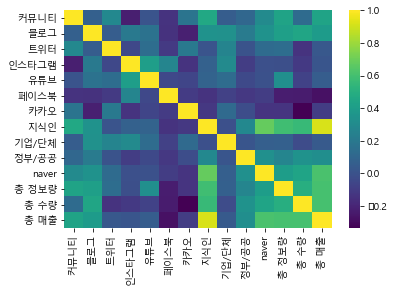

In [70]:
sns.heatmap(corr, cmap='viridis')
plt.show()

In [71]:
corr.to_csv("./corr_heat.csv")